In [ ]:

import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport

In [ ]:
data = pd.read_csv("scopus.csv")

In [ ]:
profile = ProfileReport(data, title="Profiling Report")

In [ ]:
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
import numpy as np
import pandas as pd

import requests
from bs4 import BeautifulSoup

from PIL import Image
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt

import string
import nltk
from nltk.corpus import stopwords

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
punctuation=[]
for s in string.punctuation:
    punctuation.append(str(s))
sp_punctuation = ["¿", "¡", "“", "”", "…", ":", "–", "»", "«"]    

punctuation += sp_punctuation

In [ ]:
data.columns

Index(['Authors', 'Author full names', 'Author(s) ID', 'Titles', 'Year',
       'Source title', 'Volume', 'Issue', 'Art. No.', 'Page start', 'Page end',
       'Page count', 'DOI', 'Cited by', 'Link', 'Abstract', 'Indexed Keywords',
       'Author Keywords', 'Document Type', 'Publication Stage', 'Open Access',
       'Source', 'EID'],
      dtype='object')

In [ ]:
titulos = str
for titulo in data["Titles"]:
    titulos = titulo + " " + str(titulos)
titulos

'Energy aware task consolidation in fog computing environment An intelligent ubiquitous activity aware framework for smart home 5th International Conference on Advanced Machine Learning Technologies and Applications, AMLTA 2020 Smart healthcare-oriented online prediction of lower-limb kinematics and kinetics based on data-driven neural signal decoding Vesta: A digital health analytics platform for a smart home in a box IoTility: Architectural Requirements for Enabling Health IoT Ecosystems Preference and usability of Smart-Home services and items - A Focus on the Smart-Home living-lab – A resource analysis of the use of the video function of electronic devices for home exercise instruction in rehabilitation Improving the Frequency and Documentation of Gun Safety Counseling in a Resident Primary Care Clinic Implementation of recommendation system and technology for villages using machine learning and iot Architecture and framework enabling internet of vehicles towards intelligent transp

In [ ]:
stop_words = stopwords.words('english')

In [ ]:
for p in punctuation:
    clean_texto = titulos.lower().replace(p,"")
    
for p in punctuation:
    clean_texto = clean_texto.replace(p,"")


In [ ]:
for stop in stop_words:
    clean_texto_list = clean_texto.split()
    clean_texto_list = [i.strip() for i in clean_texto_list]
    try:
        while stop in clean_texto_list: clean_texto_list.remove(stop)
    except:
        print("Error")
        pass
    clean_texto= " ".join(clean_texto_list)

In [ ]:
lista_texto = clean_texto.split(" ")

palabras = []

for palabra in lista_texto:
    if (len(palabra)>=3 and len(palabra)<18):
        palabras.append(palabra)

In [ ]:
word_count={}
for palabra in palabras:
    if palabra in word_count.keys():
        word_count[palabra][0]+=1
    else:
        word_count[palabra]=[1]
 

In [ ]:
df = pd.DataFrame.from_dict(word_count).transpose()
df.columns=["freq"]
df.sort_values(["freq"], ascending=False, inplace=True)
df.head(10)

,freq
smart,570
home,279
using,278
system,276
monitoring,233
iot,233
based,211
health,196
care,149
internet,135


In [ ]:
def plot_bar(data=df, top=5):    
    fig = plt.figure()
    ax = fig.add_axes([0,0,2,1])
    ax.bar(x =df.iloc[:top,:].index, height = df.iloc[:top,0].values)
    plt.show()

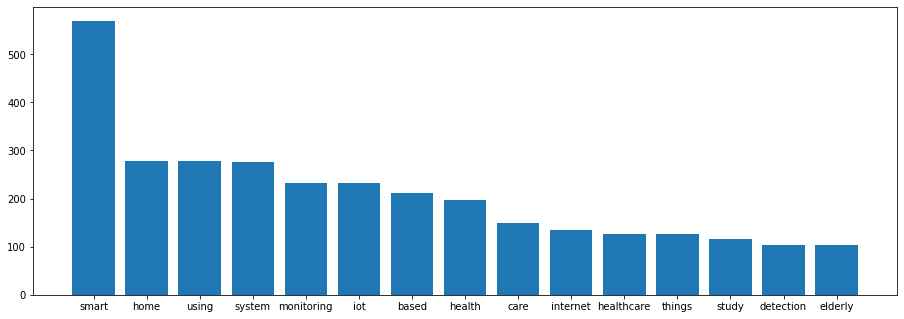

In [ ]:
plot_bar(data=df, top=15)

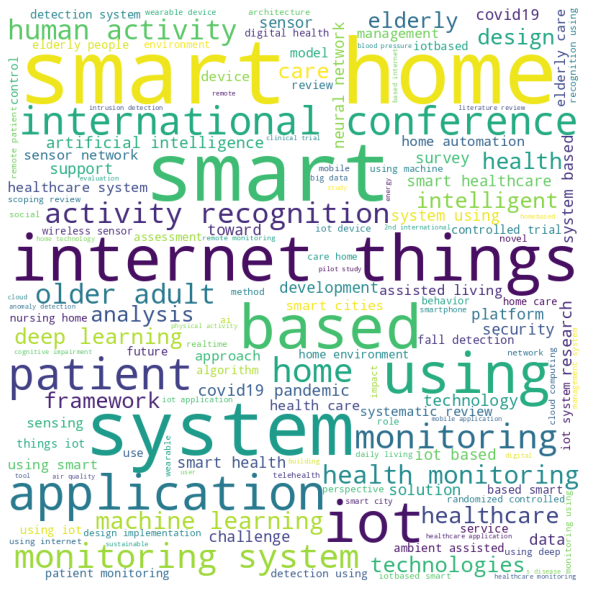

In [ ]:
word_cloud = WordCloud(height=800, width=800, background_color='white',max_words=150, min_font_size=5, collocation_threshold=10).generate(clean_texto)

word_cloud.to_file("n1.png") #Guardamos la imagen generada

plt.figure(figsize=(10,8))
plt.imshow(word_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [ ]:
data.head()

,Authors,Author full names,Author(s) ID,Titles,Year,Source title,Volume,Issue,Art. No.,Page start,...,Cited by,Link,Abstract,Indexed Keywords,Author Keywords,Document Type,Publication Stage,Open Access,Source,EID
0,NaN,NaN,NaN,"3rd International Conference on Data Science, ...",2023,Lecture Notes in Electrical Engineering,947,NaN,NaN,NaN,...,0,https://www.scopus.com/inward/record.uri?eid=2...,The proceedings contain 85 papers. The special...,NaN,NaN,Conference review,Final,NaN,Scopus,2-s2.0-85149973181
1,Sorwar G.; Aggar C.; Penman O.; Seton C.; Ward A.,"Sorwar, Golam (55941054300); Aggar, Christina ...",55941054300; 25633909900; 57225071643; 5718853...,Factors that predict the acceptance and adopti...,2023,Informatics for Health and Social Care,48,1,NaN,80,...,1,https://www.scopus.com/inward/record.uri?eid=2...,Smart Home Technology presents an exciting opp...,Aged; Australia; Humans; Longitudinal Studies;...,acceptance and adoption models; australian; se...,Article,Final,NaN,Scopus,2-s2.0-85130010999
2,Kumpik D.P.; Santos-Rodriguez R.; Selwood J.; ...,"Kumpik, Daniel Paul (26434363200); Santos-Rodr...",26434363200; 27968154800; 57205408054; 5554260...,A longitudinal observational study of home-bas...,2022,BMJ Open,12,11,e065033,NaN,...,0,https://www.scopus.com/inward/record.uri?eid=2...,Introduction Limitations in effective dementia...,Biomarkers; Cognitive Dysfunction; Dementia; F...,Adult neurology; Dementia; GERIATRIC MEDICINE;...,Article,Final,All Open Access; Gold Open Access; Green Open ...,Scopus,2-s2.0-85142939066
3,Ramanathan U.; Pelc K.; Costa T.P.D.; Ramanath...,"Ramanathan, Usha (35222184300); Pelc, Katarzyn...",35222184300; 57971513800; 58055713800; 5805549...,A Case Study of Human Milk Banking with Focus ...,2023,Sustainability (Switzerland),15,1,243,NaN,...,2,https://www.scopus.com/inward/record.uri?eid=2...,Human milk is the biological norm for newborn ...,algorithm; blood; GPS; milk; relative humidity...,human milk bank; IoT technologies; temperature...,Article,Final,All Open Access; Gold Open Access; Green Open ...,Scopus,2-s2.0-85146046545
4,Hayashi V.T.; Ruggiero W.V.; Estrella J.C.; Fi...,"Hayashi, Victor Takashi (57218551681); Ruggier...",57218551681; 6507255889; 15059935900; 57350705...,A TDD Framework for Automated Monitoring in In...,2022,Sensors,22,23,9498,NaN,...,1,https://www.scopus.com/inward/record.uri?eid=2...,"Robust, fault tolerant, and available systems ...",Algorithms; Internet; Internet of Things; Mach...,IoT; machine learning; software engineering; T...,Article,Final,All Open Access; Gold Open Access; Green Open ...,Scopus,2-s2.0-85143755750
